# Finding and drawing contours

In [3]:
import numpy as np
import imutils
import cv2

# 資料視覺化模組
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 不要顯示惱人的 warning 訊息
import warnings
warnings.filterwarnings('ignore')

# 在 Notebook 裡可即時繪圖
%matplotlib inline  

plt.rcParams['figure.figsize'] = [15, 7]
plt.rcParams.update({'font.size':13})

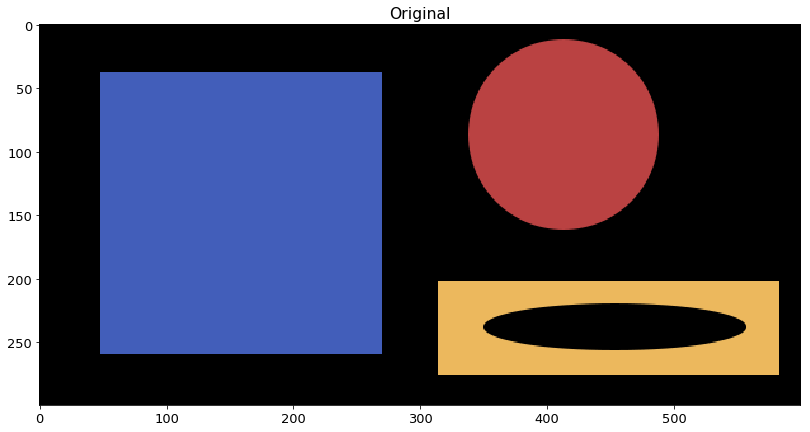

In [4]:
# load the image and convert it to grayscale
image = cv2.imread("../input/basic_shapes.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# show the original image
plt.title("Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### display our image with detected contours to our screen

Found 4 contours


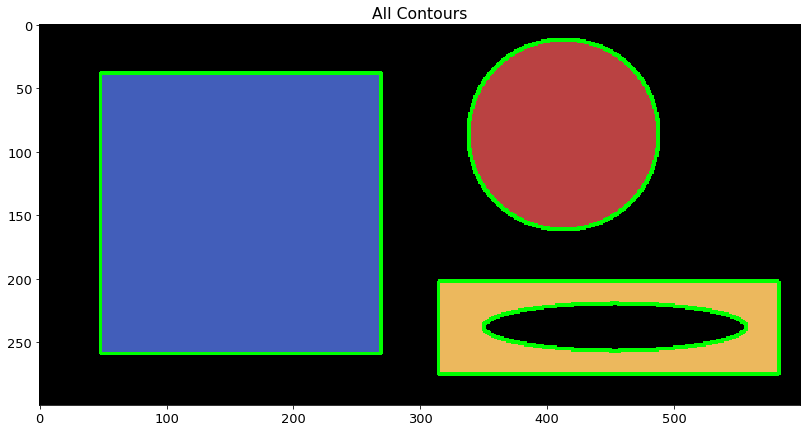

In [5]:
# find all contours in the image and draw ALL contours on the image
cnts = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
clone = image.copy()
cv2.drawContours(clone, cnts, -1, (0, 255, 0), 2)
print("Found {} contours".format(len(cnts)))

# show the output image
plt.title("All Contours")
plt.imshow(cv2.cvtColor(clone, cv2.COLOR_BGR2RGB))
plt.show()

###  Draw the individual contour and display it on screen

Drawing contour #1


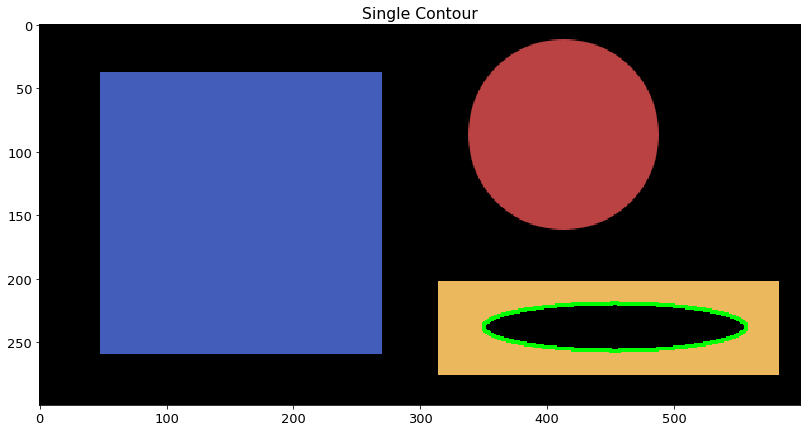

Drawing contour #2


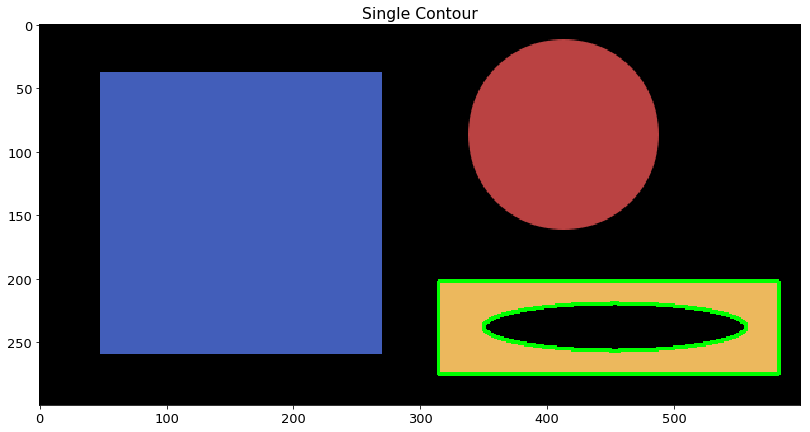

Drawing contour #3


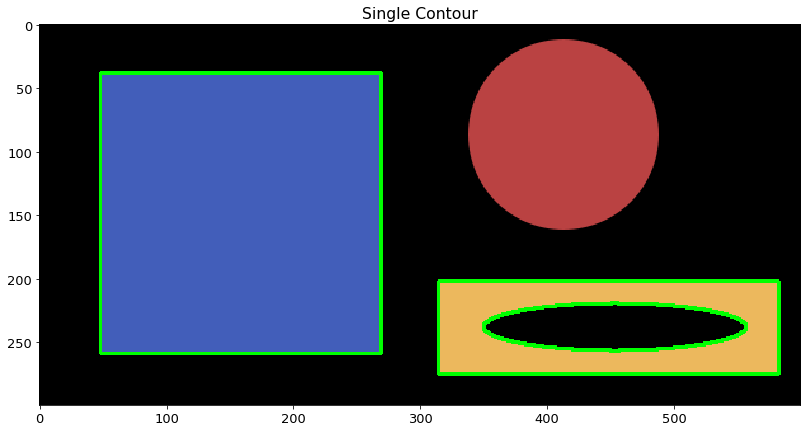

Drawing contour #4


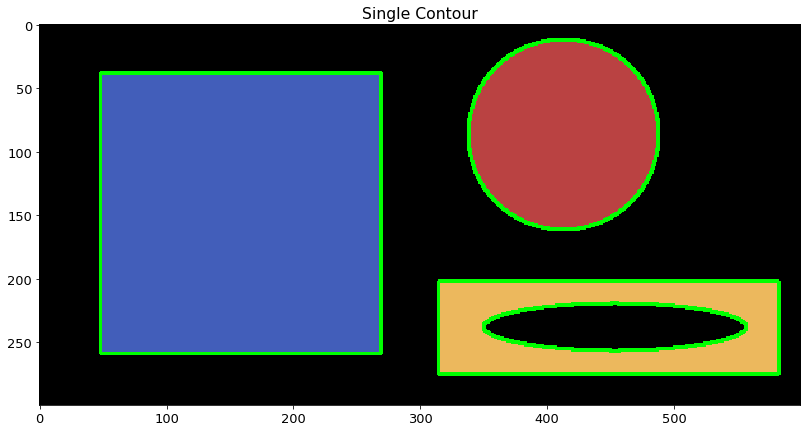

In [7]:
# re-clone the image and close all open windows
clone = image.copy()

# loop over the contours individually and draw each of them
for (i, c) in enumerate(cnts):
    print("Drawing contour #{}".format(i + 1))
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
    plt.title("Single Contour")
    plt.imshow(cv2.cvtColor(clone, cv2.COLOR_BGR2RGB))
    plt.show()
    

### find only external contours and ignore the ovular region inside the orange rectangle

Found 3 EXTERNAL contours


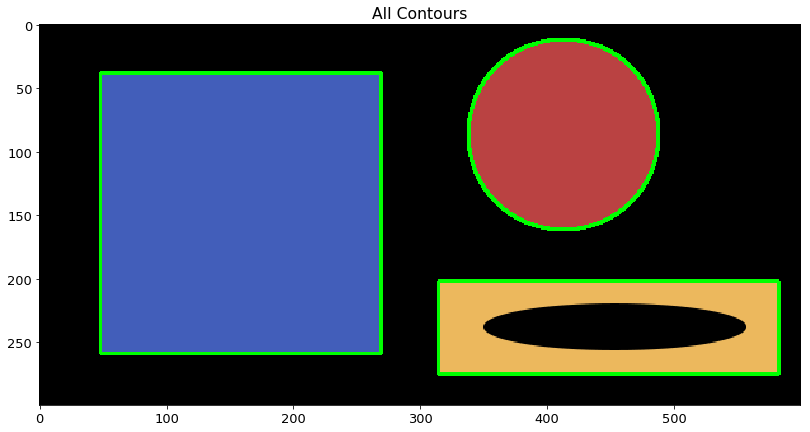

In [8]:
# re-clone the image and close all open windows
clone = image.copy()

# find contours in the image, but this time keep only the EXTERNAL
# contours in the image
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cv2.drawContours(clone, cnts, -1, (0, 255, 0), 2)
print("Found {} EXTERNAL contours".format(len(cnts)))

# show the output image
plt.title("All Contours")
plt.imshow(cv2.cvtColor(clone, cv2.COLOR_BGR2RGB))
plt.show()

###  對 External contour 套用 Mask

1. 定義每個 contours 成為 Mask，並繪製成白色(#255)
2. 合併 Mask 與原圖。bitwise_and 只留下 Mask 裡 non-zero(白色) 區域的圖

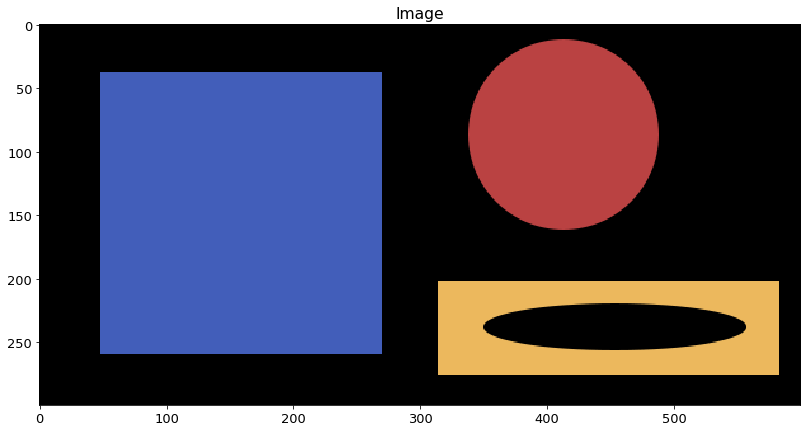

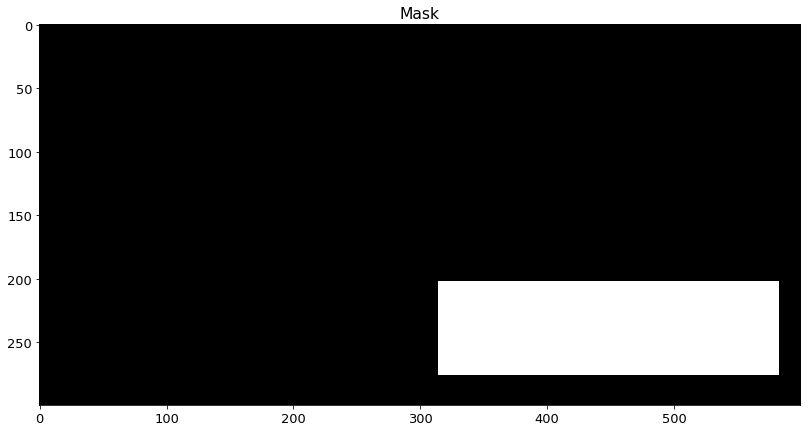

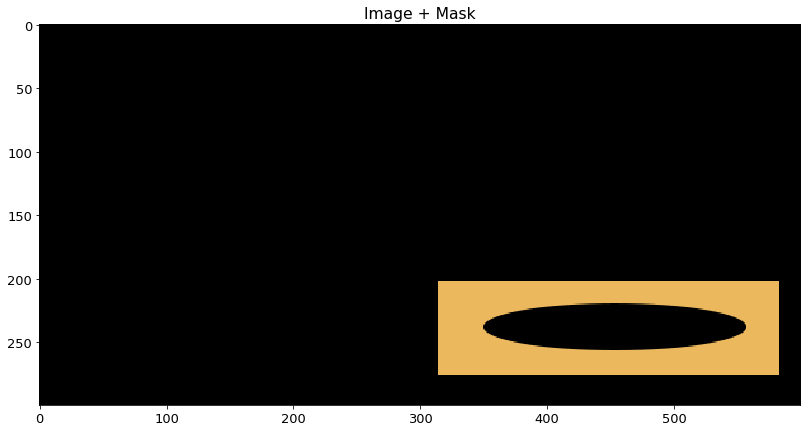

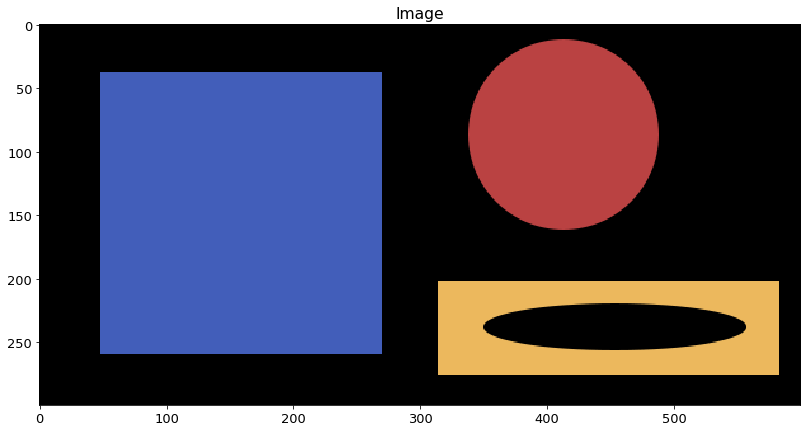

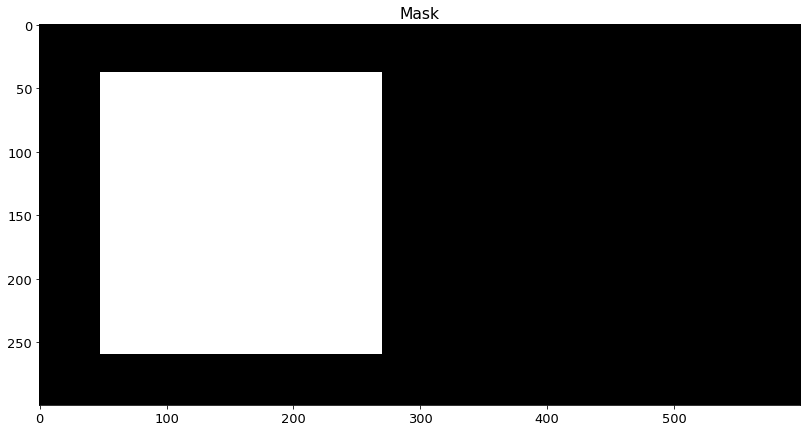

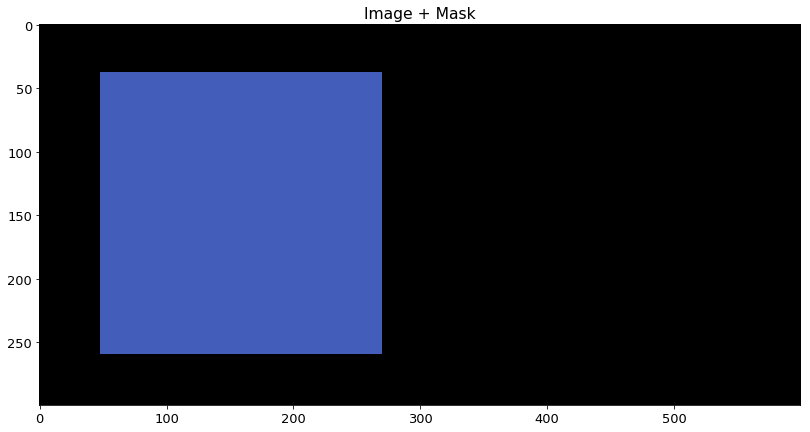

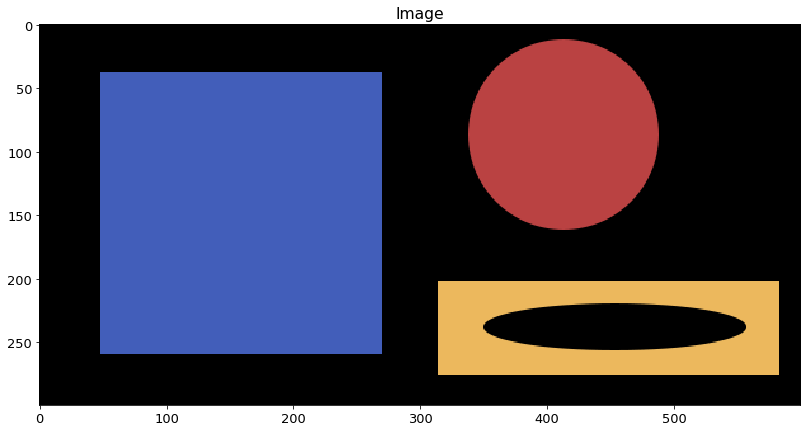

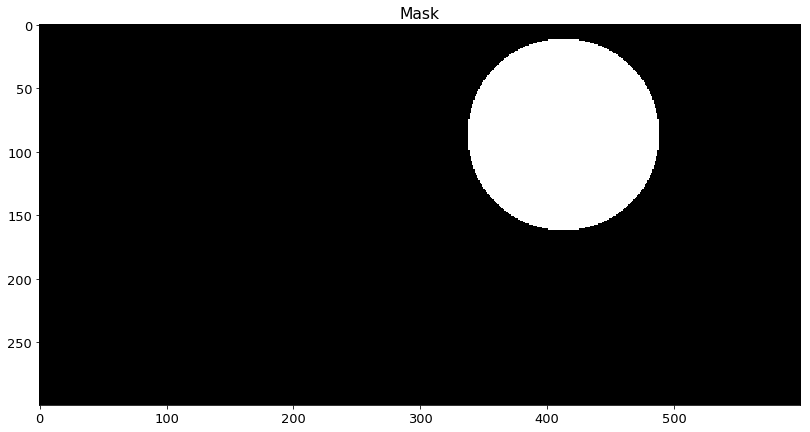

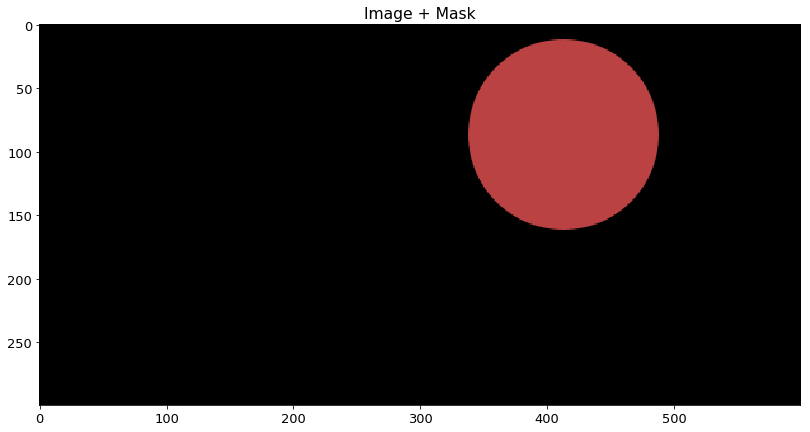

In [9]:
# re-clone the image and close all open windows
clone = image.copy()

# loop over the contours individually
for c in cnts:
    # construct a mask by drawing only the current contour
    mask = np.zeros(gray.shape, dtype="uint8")
    cv2.drawContours(mask, [c], -1, 255, -1)

    # show the images
    plt.title("Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    
    plt.title("Mask")
    plt.imshow(mask, cmap="gray")
    plt.show()

    output = cv2.bitwise_and(image, image, mask=mask)
    plt.title("Image + Mask")
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.show()